In [1]:
#import standard required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Inspect shape of the data
df.shape

(541909, 8)

In [4]:
#Inspect null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Checking type of missing value
import math
x = float('nan')
math.isnan(x)

True

## Data Preparation

In [7]:
#Handling Missing Value
df.dropna(subset = ["CustomerID"], inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape

(406829, 8)

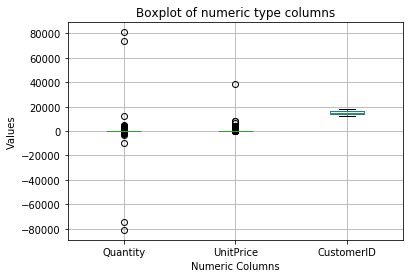

In [9]:
# Check the range of each numeric type columns using boxplot
df.select_dtypes(['integer', 'float']).boxplot()
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.title('Boxplot of numeric type columns')
plt.show()

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df[df['UnitPrice']==0].count()

InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [12]:
#Deleting row where unit price = 0
df.drop(df.loc[df['UnitPrice']==0].index, inplace=True)

In [13]:
df.shape

(406789, 8)

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df.select_dtypes(['object']).describe()

,InvoiceNo,StockCode,Description,Country
count,406789,406789,406789,406789
unique,22186,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2077,2070,361854


In [16]:
#Checking where value of quantity is negative
df[df['Quantity'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
#Removing negative value of quantity
df.drop(df.loc[df['Quantity']<0].index, inplace=True)

In [18]:
df.shape

(397884, 8)

## Exploratory Data Analysis

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
#Agregation based on sales by country
df_country = df.groupby('Country', as_index=False)['Quantity'].sum()
df_country = df_country.rename(columns={'Quantity':'Total Sales'})
df_country

,Country,Total Sales
0,Australia,83901
1,Austria,4881
2,Bahrain,260
3,Belgium,23237
4,Brazil,356
5,Canada,2763
6,Channel Islands,9491
7,Cyprus,6361
8,Czech Republic,671
9,Denmark,8235


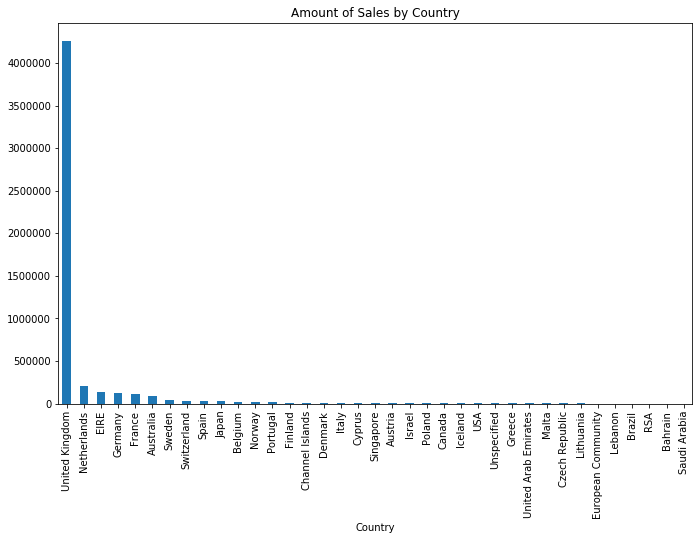

In [21]:
#Total product sales based on country using bar chart
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).plot(kind='bar', title='Amount of Sales by Country')

In [22]:
#Creating new variable of sales item
item_sum = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False)

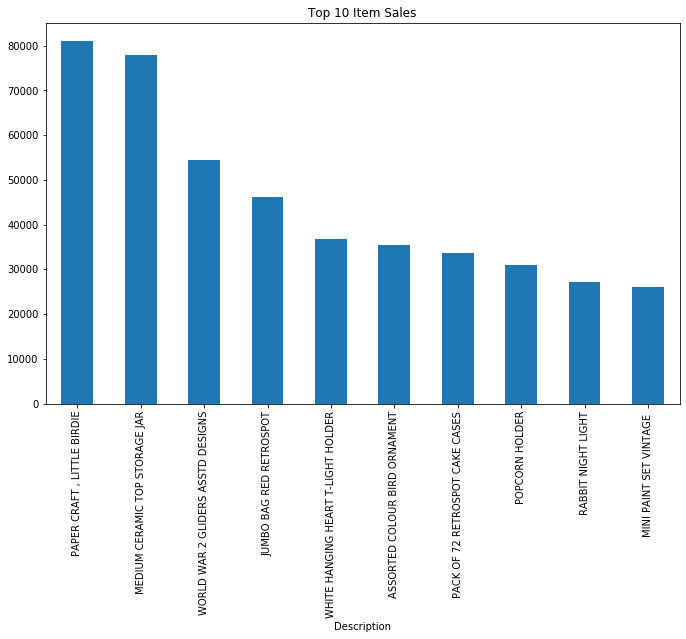

In [23]:
#Bar chart for sales item
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(item_sum[:10].index)
item_sum[Top10].plot(kind='bar', title='Top 10 Item Sales')

## Data Preporcessing

In [24]:
# Drop InvoiceID column
df.drop(['InvoiceDate'], axis=1, inplace=True)

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [26]:
df.shape

(397884, 7)

In [27]:
df.select_dtypes(['object']).describe()

,InvoiceNo,StockCode,Description,Country
count,397884,397884,397884,397884
unique,18532,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2035,2028,354321


In [28]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Feature Engineering

In [30]:
#Creating new variable 'Buying power'
df['BuyingPower'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,BuyingPower
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60


In [31]:
df.groupby('CustomerID')['BuyingPower'].sum()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: BuyingPower, Length: 4338, dtype: float64

In [32]:
# Agregation based on buying power customer
df_buying = df.groupby('CustomerID', as_index=False)['BuyingPower'].sum()
df_buying = df_buying.rename(columns={'BuyingPower':'BuyingPowerPerCustomer'})
df_buying

,CustomerID,BuyingPowerPerCustomer
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [33]:
df['CustomerID'].nunique()

4338

In [34]:
#Creating new variable total quantity per customer
df_customer = df.groupby('CustomerID', as_index=False)['Quantity'].sum()

In [36]:
new_df = pd.concat((df_buying, df_customer), axis = 1)
new_df

,CustomerID,BuyingPowerPerCustomer,CustomerID,Quantity
0,12346.0,77183.60,12346.0,74215
1,12347.0,4310.00,12347.0,2458
2,12348.0,1797.24,12348.0,2341
3,12349.0,1757.55,12349.0,631
4,12350.0,334.40,12350.0,197
...,...,...,...,...
4333,18280.0,180.60,18280.0,45
4334,18281.0,80.82,18281.0,54
4335,18282.0,178.05,18282.0,103
4336,18283.0,2094.88,18283.0,1397


In [37]:
df_new = pd.merge(df_buying, df_customer,on='CustomerID')
df_new

,CustomerID,BuyingPowerPerCustomer,Quantity
0,12346.0,77183.60,74215
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197
...,...,...,...
4333,18280.0,180.60,45
4334,18281.0,80.82,54
4335,18282.0,178.05,103
4336,18283.0,2094.88,1397


In [38]:
#Creating new variable 'quartile' for every total quantity and buying power
df_new['q_quartile'] = pd.qcut(df_new['Quantity'], 5, ['5','4','3','2','1'])
df_new['b_quartile'] = pd.qcut(df_new['BuyingPowerPerCustomer'], 5, ['5','4','3','2','1'])
df_new

,CustomerID,BuyingPowerPerCustomer,Quantity,q_quartile,b_quartile
0,12346.0,77183.60,74215,1,1
1,12347.0,4310.00,2458,1,1
2,12348.0,1797.24,2341,1,2
3,12349.0,1757.55,631,2,2
4,12350.0,334.40,197,4,4
...,...,...,...,...,...
4333,18280.0,180.60,45,5,5
4334,18281.0,80.82,54,5,5
4335,18282.0,178.05,103,5,5
4336,18283.0,2094.88,1397,1,1


## Modelling

In [52]:
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

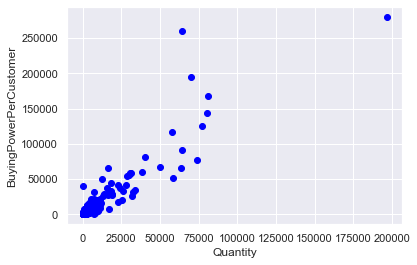

In [40]:
X = df_new[["Quantity","BuyingPowerPerCustomer"]]
#Visualise data points
plt.scatter(X["Quantity"],X["BuyingPowerPerCustomer"],c='blue')
plt.xlabel('Quantity')
plt.ylabel('BuyingPowerPerCustomer')
plt.show()

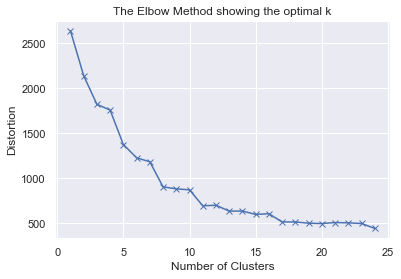

In [54]:
# k means determine k
distortions = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
#Modelling with KMeans with cluster = 16
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)

In [42]:
#Creating new columns for cluster
df_new['Label'] = kmeans.labels_
df_new

,CustomerID,BuyingPowerPerCustomer,Quantity,q_quartile,b_quartile,Label
0,12346.0,77183.60,74215,1,1,14
1,12347.0,4310.00,2458,1,1,0
2,12348.0,1797.24,2341,1,2,11
3,12349.0,1757.55,631,2,2,11
4,12350.0,334.40,197,4,4,3
...,...,...,...,...,...,...
4333,18280.0,180.60,45,5,5,3
4334,18281.0,80.82,54,5,5,3
4335,18282.0,178.05,103,5,5,3
4336,18283.0,2094.88,1397,1,1,11


In [49]:
kmeans.cluster_centers_

array([[2.14284943e+03, 3.57633202e+03],
       [6.41240000e+04, 2.59657300e+05],
       [3.16804000e+04, 5.77782140e+04],
       [2.62797869e+02, 4.50720942e+02],
       [7.18413333e+04, 1.28706407e+05],
       [1.96915000e+05, 2.80206020e+05],
       [1.70124545e+04, 2.79531527e+04],
       [3.76436306e+03, 6.21552299e+03],
       [7.54950000e+04, 1.81511645e+05],
       [5.30295000e+04, 6.60613300e+04],
       [2.84865714e+04, 3.53055900e+04],
       [1.05043806e+03, 1.75253787e+03],
       [1.17915000e+04, 5.00268500e+04],
       [5.98083077e+03, 1.09517026e+04],
       [6.93820000e+04, 8.41229900e+04],
       [9.07900000e+03, 1.78423219e+04]])

In [43]:
df_result = pd.DataFrame()
df_result = df_new[['q_quartile','b_quartile','Label']]
df_result

,q_quartile,b_quartile,Label
0,1,1,14
1,1,1,0
2,1,2,11
3,2,2,11
4,4,4,3
...,...,...,...
4333,5,5,3
4334,5,5,3
4335,5,5,3
4336,1,1,11


In [66]:
#Percentage of every cluster 
df_label_total = pd.DataFrame()
df_label_total['Percentage'] = df_result['Label'].value_counts(normalize=True)*100
df_label_total.sort_index(axis = 0)

,Percentage
0,8.206547
1,0.023052
2,0.115260
3,64.545874
4,0.069156
5,0.023052
6,0.253573
7,3.734440
8,0.046104
9,0.092208


In [68]:
df_label_percentage = df_label_total.sort_index(axis = 0)

In [62]:
#Counting label for q and b quartile
df_result.groupby(['Label']).count()

,q_quartile,b_quartile
Label,,
0,356,356
1,1,1
2,5,5
3,2800,2800
4,3,3
5,1,1
6,11,11
7,162,162
8,2,2


In [63]:
df_result_new = df_result.groupby(['Label']).count()

In [76]:
#Result of clustering experiment
final_result = pd.concat((df_result_new, df_label_percentage), axis = 1)
final_result

,q_quartile,b_quartile,Percentage
0,356,356,8.206547
1,1,1,0.023052
2,5,5,0.115260
3,2800,2800,64.545874
4,3,3,0.069156
5,1,1,0.023052
6,11,11,0.253573
7,162,162,3.734440
8,2,2,0.046104
9,4,4,0.092208


In [79]:
final_result.rename(columns = {"q_quartile": "F,M label 1 to 5 quantiles", 
                                }).drop(['b_quartile'], axis = 1)

,"F,M label 1 to 5 quantiles",Percentage
0,356,8.206547
1,1,0.023052
2,5,0.115260
3,2800,64.545874
4,3,0.069156
5,1,0.023052
6,11,0.253573
7,162,3.734440
8,2,0.046104
9,4,0.092208
